In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 상현_쓰레기데이터 EDA
- 데이터 2019년도 발생량, 재활용, 매립, 소각, 기타만 * 365

In [3]:
waste = pd.read_csv('../../DB/폐기물데이터_행정구역변경_2.csv', encoding='CP949')

In [4]:
waste

,행정구역,시도,시군구,폐기물_종류,폐기물_종류1,폐기물_종류2,재활용,소각,매립,기타,발생량,연도
0,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐지류,0.0,9125.0,4672.0,0.0,13797.0,2019
1,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐합성수지류,0.0,5365.5,2737.5,0.0,8103.0,2019
2,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐고무류,0.0,182.5,73.0,0.0,255.5,2019
3,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐섬유류,0.0,511.0,255.5,0.0,766.5,2019
4,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,음식물류 폐기물,0.0,693.5,365.0,0.0,1058.5,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
42360,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,폐전기전자제품,NaN,1027.6,0.0,0.0,0.0,1027.6,2023
42361,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,폐가구류,NaN,0.0,0.0,0.0,0.0,0.0,2023
42362,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,기타,NaN,200.0,0.0,0.0,0.0,200.0,2023
42363,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,재활용 잔재물,NaN,0.0,1627.4,718.0,0.0,2345.4,2023


# 폐기물_종류

In [57]:
waste_group1_mean = waste.groupby('폐기물_종류').agg({
  '재활용':'mean',
  '소각': 'mean',
  '매립':'mean',
  '기타':'mean',
  '발생량':'mean'})

In [58]:
waste_group1_sum = waste.groupby('폐기물_종류').agg({
  '재활용':'sum',
  '소각': 'sum',
  '매립':'sum',
  '기타':'sum',
  '발생량':'sum'})

In [59]:
waste_group1_mean

,재활용,소각,매립,기타,발생량
폐기물_종류,,,,,
음식물류 폐기물 분리배출,19463.653188,282.740524,182.571616,104.700786,20033.666114
재활용 가능자원 분리배출,821.310564,37.763286,9.565931,1.558004,870.197783
종량제방식 등 혼합배출,329.383983,1370.810323,629.768949,22.082684,2352.045939


In [60]:
waste_group1_sum

,재활용,소각,매립,기타,발생량
폐기물_종류,,,,,
음식물류 폐기물 분리배출,22285882.9,323737.9,209044.5,119882.4,22938547.7
재활용 가능자원 분리배출,19748412.5,908018.2,230012.8,37462.2,20923905.7
종량제방식 등 혼합배출,5657169.9,23543667.3,10816281.7,379270.1,40396389.0


In [62]:
waste_group1_sum['발생량']/sum(waste_group1_sum['발생량'])
# 종량제방식 등 혼합배출이 0.4로 제일 많음
# 음식물류와 재활용은 비슷

폐기물_종류
음식물류 폐기물 분리배출     0.272239
재활용 가능자원  분리배출    0.248329
종량제방식 등 혼합배출      0.479432
Name: 발생량, dtype: float64

In [35]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# 한글 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

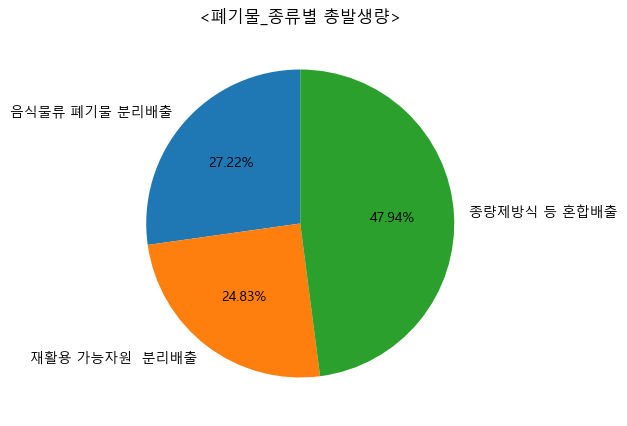

In [64]:
plt.figure(figsize=(10,5))

plt.pie(x = waste_group1_sum['발생량'],
        labels = waste_group1_sum.index,
        autopct='%.2f%%',
        startangle= 90 # 시계 반대방향
        )
plt.title('<폐기물_종류별 총발생량>')

plt.show()

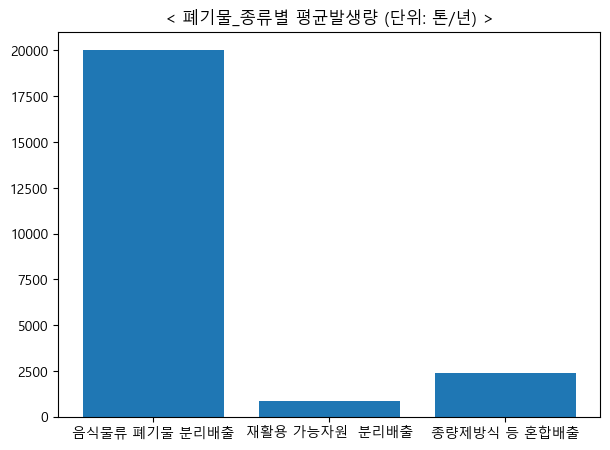

In [65]:
plt.figure(figsize=(7,5))
x = np.arange(len(waste_group1_mean.index))
y = waste_group1_mean['발생량'].to_list()

plt.bar(x, y)
plt.xticks(x, waste_group1_mean.index)
plt.title('< 폐기물_종류별 평균발생량 (단위: 톤/년) >')
plt.show()

# 음식물이 평균이 제일 높음

### 폐기물_종류별 통계량

In [66]:
waste_group1_sum

,재활용,소각,매립,기타,발생량
폐기물_종류,,,,,
음식물류 폐기물 분리배출,22285882.9,323737.9,209044.5,119882.4,22938547.7
재활용 가능자원 분리배출,19748412.5,908018.2,230012.8,37462.2,20923905.7
종량제방식 등 혼합배출,5657169.9,23543667.3,10816281.7,379270.1,40396389.0


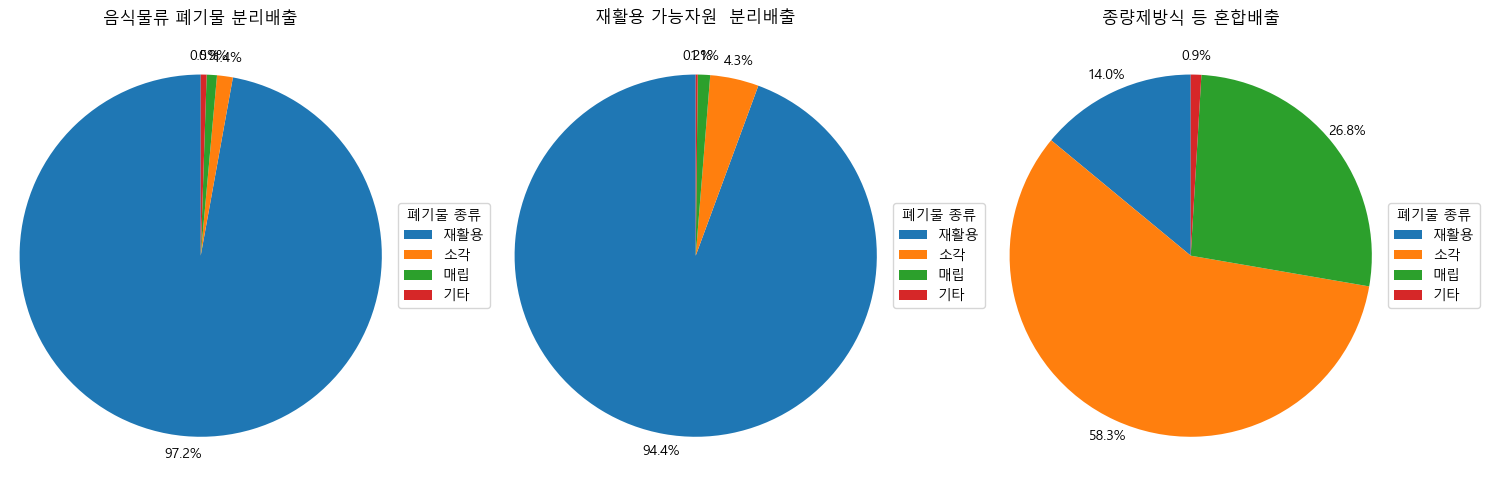

In [107]:
# '발생량' 컬럼 제외
forpiechart = waste_group1_sum.drop(columns='발생량')

# 하나의 Figure에 3개 파이차트 배치 (기본 색상 사용)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (waste_type, row) in zip(axes, forpiechart.iterrows()):
    wedges, texts, autotexts = ax.pie(
        row,
        labels=None,            # 내부 레이블 생략
        autopct='%1.1f%%',
        startangle=90,
        # labeldistance=1,
        pctdistance=1.1
    )
    ax.set_title(waste_type)
    ax.axis('equal')  # 원형 유지

    # 범례 추가 (기본 색상에 맞춰)
    ax.legend(
        wedges,
        row.index,
        title="폐기물 종류",
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )

plt.tight_layout()
plt.show()

- 글자 안겹치게 하고 싶은데 시간 많을 때 하잠..
- 종량제에서 재활용이 그렇게 많지 않아서 종량제방식 등 혼합배출과 재활용 가능자원 분리배출 두개를 합쳐서 하는게 좋지않을까...?

# 연도 X 폐기물_종류

In [162]:
waste_group1_year = waste.groupby(['폐기물_종류','연도'])[['재활용', '소각', '매립', '기타', '발생량']].agg('sum').reset_index()
waste_group1_year

,폐기물_종류,연도,재활용,소각,매립,기타,발생량
0,음식물류 폐기물 분리배출,2019,4647289.5,86760.5,54275.5,7336.5,4795662.0
1,음식물류 폐기물 분리배출,2020,4556157.2,64071.0,48385.7,1765.1,4670379.0
2,음식물류 폐기물 분리배출,2021,4336599.9,64532.7,37995.5,36429.8,4475557.9
3,음식물류 폐기물 분리배출,2022,4443707.2,39483.1,35200.6,39175.0,4557565.9
4,음식물류 폐기물 분리배출,2023,4302129.1,68890.6,33187.2,35176.0,4439382.9
5,재활용 가능자원 분리배출,2019,3988647.0,240389.0,57305.0,21462.0,4307803.0
6,재활용 가능자원 분리배출,2020,4306252.5,225587.5,56685.2,2517.0,4591042.2
7,재활용 가능자원 분리배출,2021,3923303.4,154369.7,49851.6,425.7,4127950.4
8,재활용 가능자원 분리배출,2022,3741944.6,150224.3,37543.9,7482.4,3937195.2
9,재활용 가능자원 분리배출,2023,3788265.0,137447.7,28627.1,5575.1,3959914.9


- 종량제방식 중 재활용이 재활용 가능자원임은 아니라고 판단됨
  - 어떤 년도를 살펴봐도 종량제방식['재활용']이 재활용가능자원['재활용']도 재활용가능자원['발생량']도 아님을 확인할수 있음

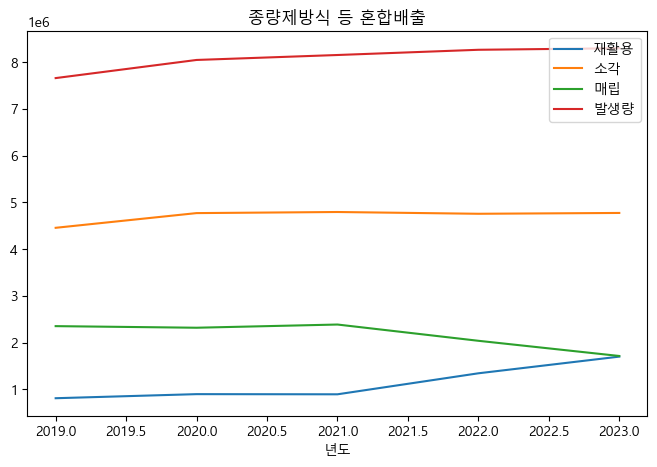

In [167]:
forplot = waste_group1_year[waste_group1_year['폐기물_종류']=='종량제방식 등 혼합배출']
plt.figure(figsize=(8,5))

plt.plot(forplot['연도'], forplot['재활용'], label = '재활용')
plt.plot(forplot['연도'], forplot['소각'], label = '소각')
plt.plot(forplot['연도'], forplot['매립'], label = '매립')
plt.plot(forplot['연도'], forplot['발생량'], label = '발생량')

plt.xlabel('년도') 

plt.legend()
plt.title('종량제방식 등 혼합배출')
plt.show()

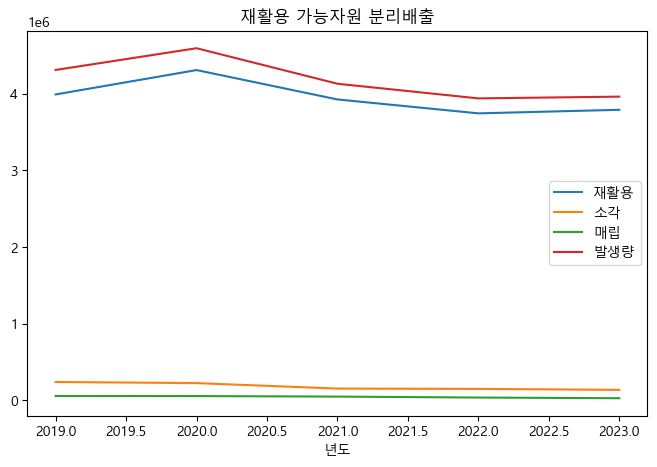

In [169]:
forplot = waste_group1_year[waste_group1_year['폐기물_종류']=='재활용 가능자원  분리배출']
plt.figure(figsize=(8,5))

plt.plot(forplot['연도'], forplot['재활용'], label = '재활용')
plt.plot(forplot['연도'], forplot['소각'], label = '소각')
plt.plot(forplot['연도'], forplot['매립'], label = '매립')
plt.plot(forplot['연도'], forplot['발생량'], label = '발생량')

plt.xlabel('년도') 

plt.legend()
plt.title('재활용 가능자원 분리배출')
plt.show()

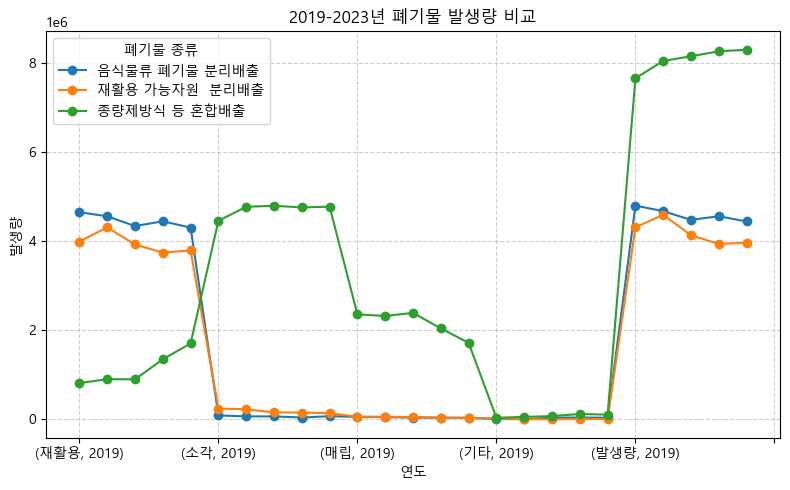

In [ ]:
# forchart = waste_group1_year.loc['재활용 가능자원 분리배출']
plt.figure(figsize=(8,5))
plot_data_unstacked.T.plot(kind='line', marker='o', ax=plt.gca()) # .T를 사용하여 연도를 x축으로

plt.title('2019-2023년 폐기물 발생량 비교') # 그래프 제목
plt.xlabel('연도') # x축 레이블
plt.ylabel('발생량') # y축 레이블
# plt.xticks(plot_data_unstacked.columns) # x축 틱을 연도 값으로 설정
plt.grid(True, linestyle='--', alpha=0.6) # 그리드 추가
plt.legend(title='폐기물 종류') # 범례 추가
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 그래프 표시

In [68]:
waste_group1_sum.loc['음식물류 폐기물 분리배출']

재활용    22285882.9
소각       323737.9
매립       209044.5
기타       119882.4
발생량    22938547.7
Name: 음식물류 폐기물 분리배출, dtype: float64

In [82]:
waste_group1_sum.index.to_list()

['음식물류 폐기물 분리배출', '재활용 가능자원  분리배출', '종량제방식 등 혼합배출']

TypeError: object of type 'builtin_function_or_method' has no len()

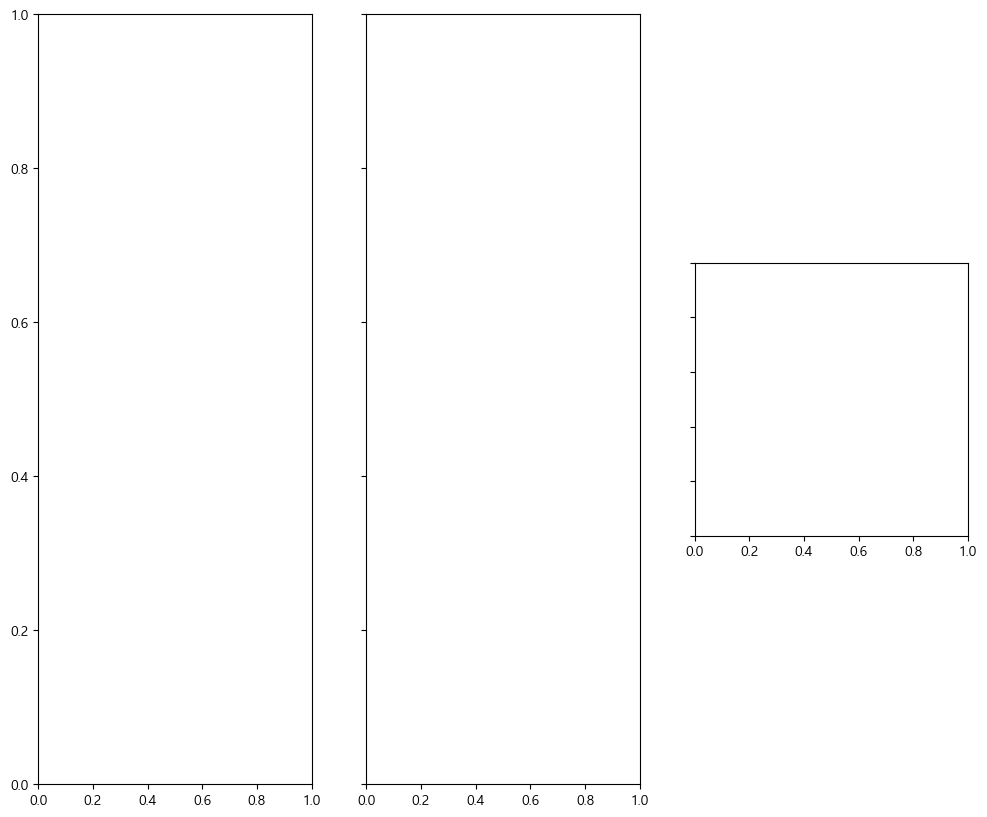

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 10), sharey=True)
indexlist = waste_group1_sum.index.to_list()

for ax, id in zip(axes.flatten(), indexlist):
  plt.pie(x = waste_group1_sum.loc[id],
          labels = id.index)

In [24]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 10), sharey=True)

# waste_group_total.

labels = ['재활용 (Recycling)', '소각 (Incineration)', '매립 (Landfill)', '기타 (Other)']

# 각 폐기물 유형별로 원 그래프 생성 및 저장
for waste_type, data in waste_group_total.items():
    print(waste_type,'//','\n', data)
    values = [data[cat] for cat in ['재활용', '소각', '매립', '기타']]
    print(values)

    # plt.figure(figsize=(10, 7))
    # # autopct로 퍼센트 표시, startangle로 시작 각도 설정, textprops로 텍스트 크기 조절
    # plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
    # plt.title(f'{waste_type} 처리 방식별 발생량 (Sum)', fontsize=14)
    # plt.axis('equal') # 원형을 유지하도록 설정
    # plt.legend(loc='best', fontsize=10) # 범례 추가
    # plt.tight_layout() # 레이아웃 자동 조정 (라벨 겹침 방지)
    
    # # 파일명에 공백 대신 언더스코어 사용
    # plt.savefig(f'{waste_type.replace(" ", "_")}_pie_chart.png')
    # plt.close() # 현재 plt 그림 닫기 (메모리 절약)


# plt.title("폐기물_종류별 통계량")
plt.show()

('재활용', 'mean') // 
 폐기물_종류
음식물류 폐기물 분리배출     19463.653188
재활용 가능자원  분리배출      821.310564
종량제방식 등 혼합배출        329.383983
Name: (재활용, mean), dtype: float64


KeyError: '재활용'

In [25]:
waste_group_total

재활용                       소각                      매립  \
                        mean         sum         mean         sum        mean   
폐기물_종류                                                                          
음식물류 폐기물 분리배출   19463.653188  22285882.9   282.740524    323737.9  182.571616   
재활용 가능자원  분리배출    821.310564  19748412.5    37.763286    908018.2    9.565931   
종량제방식 등 혼합배출      329.383983   5657169.9  1370.810323  23543667.3  629.768949   

                                    기타                     발생량              
                       sum        mean       sum          mean         sum  
폐기물_종류                                                                      
음식물류 폐기물 분리배출     209044.5  104.700786  119882.4  20033.666114  22938547.7  
재활용 가능자원  분리배출    230012.8    1.558004   37462.2    870.197783  20923905.7  
종량제방식 등 혼합배출    10816281.7   22.082684  379270.1   2352.045939  40396389.0

In [ ]:
재활용	소각	매립	기타	발생량
mean	sum	mean	sum	mean	sum	mean	sum	mean	sum
폐기물_종류										
음식물류 폐기물 분리배출	19412.789983	22285882.9	282.001655	323737.9	182.094512	209044.5	104.427178	119882.4	19981.313328	22938547.7
재활용 가능자원 분리배출	819.164282	19748412.5	37.664601	908018.2	9.540932	230012.8	1.553932	37462.2	867.923747	20923905.7
종량제방식 등 혼합배출	328.523223	5657169.9	1367.228066	23543667.3	628.123211	10816281.7	22.024977	379270.1	2345.899477	40396389.0

In [ ]:
# 음식물 일단은 빼고 생각하기(?)

In [16]:
waste_group_main = waste.groupby(['행정구역','연도', '폐기물_종류']).agg({
  '재활용':'sum',
  '소각': 'sum',
  '매립':'sum',
  '기타':'sum',
  '발생량':'sum'})

In [17]:
waste_group_main.reset_index()

,행정구역,연도,폐기물_종류,재활용,소각,매립,기타,발생량
0,강원_강릉시,2019,음식물류 폐기물 분리배출,23104.5,0.0,0.0,0.0,23104.5
1,강원_강릉시,2019,재활용 가능자원 분리배출,25404.0,0.0,3394.5,0.0,28798.5
2,강원_강릉시,2019,종량제방식 등 혼합배출,0.0,1971.0,36974.5,0.0,38945.5
3,강원_강릉시,2020,음식물류 폐기물 분리배출,20548.0,0.0,0.0,0.0,20548.0
4,강원_강릉시,2020,재활용 가능자원 분리배출,14033.8,0.0,4307.0,0.0,18340.8
...,...,...,...,...,...,...,...,...
3439,충북_충주시,2022,재활용 가능자원 분리배출,14857.6,3727.2,0.0,0.0,18584.8
3440,충북_충주시,2022,종량제방식 등 혼합배출,0.0,36394.4,4925.3,0.0,41319.7
3441,충북_충주시,2023,음식물류 폐기물 분리배출,20445.3,0.0,0.0,0.0,20445.3
3442,충북_충주시,2023,재활용 가능자원 분리배출,14637.4,3355.3,0.0,0.0,17992.7


In [ ]:
waste.groupby(['행정구역','연도', '폐기물_종류']).agg()

In [ ]:
waste_group_total = waste.groupby("폐기물_종류").agg(
  폐기물_mean=pd.NamedAgg(column="재활용", aggfunc="mean"),
  폐기물_sum=pd.NamedAgg(column="재활용", aggfunc="sum"),
  소각_mean=pd.NamedAgg(column="소각", aggfunc="mean"),
  소각_sum=pd.NamedAgg(column="소각", aggfunc="sum"),
  매립_mean=pd.NamedAgg(column="매립", aggfunc="mean"),
  매립_sum=pd.NamedAgg(column="매립", aggfunc="sum"),
  기타_mean=pd.NamedAgg(column="기타", aggfunc="mean"),
  기타_sum=pd.NamedAgg(column="기타", aggfunc="sum"),
  발생량_mean=pd.NamedAgg(column="발생량", aggfunc="mean"),
  발생량_sum=pd.NamedAgg(column="발생량", aggfunc="sum"),
  )